<a href="https://colab.research.google.com/github/nehamahanand07/RNN_LSTM_3-stockmarket/blob/main/ms_stock_LSTM3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [ ]:
#loading data
data=pd.read_csv('/content/drive/MyDrive/MS_STOCK.csv')
print(data)
print(data.head())
print(data.info())
print(data.describe())

            Date        Open        High  ...       Close   Adj Close      Volume
0     13-03-1986    0.088542    0.101563  ...    0.097222    0.059827  1031788800
1     14-03-1986    0.097222    0.102431  ...    0.100694    0.061963   308160000
2     17-03-1986    0.100694    0.103299  ...    0.102431    0.063032   133171200
3     18-03-1986    0.102431    0.103299  ...    0.099826    0.061429    67766400
4     19-03-1986    0.099826    0.100694  ...    0.098090    0.060361    47894400
...          ...         ...         ...  ...         ...         ...         ...
9795  28-01-2025  434.600006  448.380005  ...  447.200012  447.200012    23491700
9796  29-01-2025  446.690002  446.880005  ...  442.329987  442.329987    23581400
9797  30-01-2025  418.769989  422.859985  ...  414.989990  414.989990    54586300
9798  31-01-2025  418.980011  420.690002  ...  415.059998  415.059998    34223400
9799  03-02-2025  411.600006  415.410004  ...  410.920013  410.920013    25580600

[9800 rows x 7 

In [ ]:
#date in object, convert it to date type in pandas

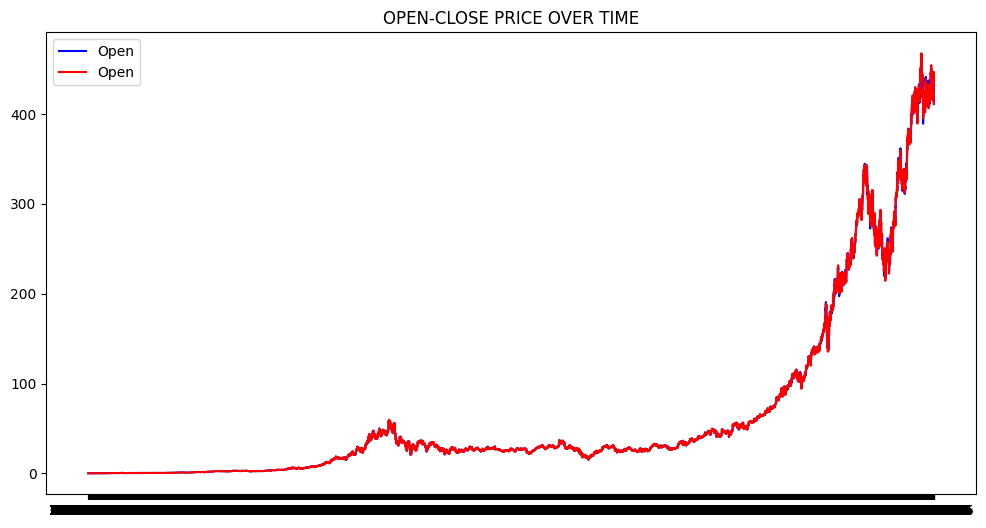

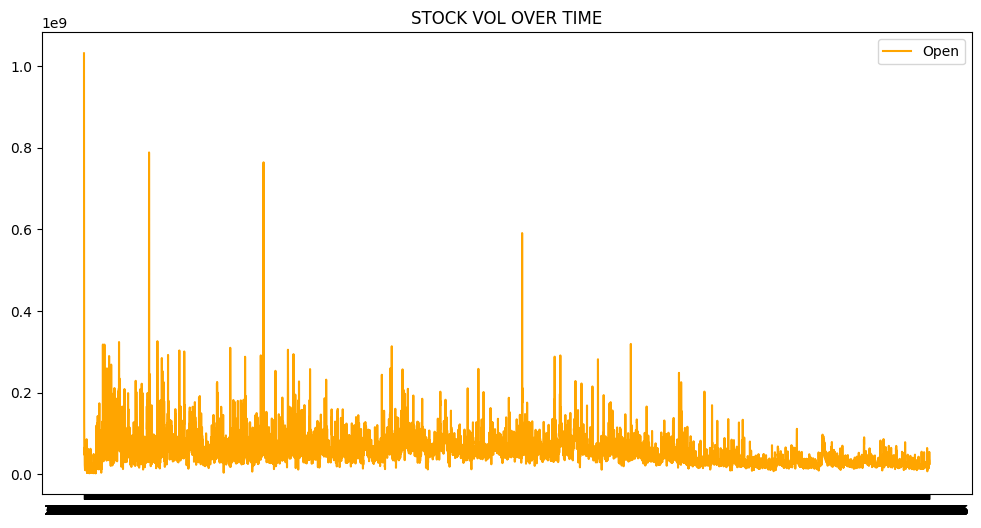

In [ ]:
#plotting initial data
plt.figure(figsize=(12,6))
plt.plot(data['Date'],data['Open'],label='Open',color='blue')
plt.plot(data['Date'],data['Close'],label='Open',color='red')
plt.title("OPEN-CLOSE PRICE OVER TIME")
plt.legend()
plt.show()



#plot 2-
plt.figure(figsize=(12,6))
plt.plot(data['Date'],data['Volume'],label='Open',color='orange')
plt.title("STOCK VOL OVER TIME")
plt.legend()
plt.show()

Text(0.5, 1.0, 'feature correlation')

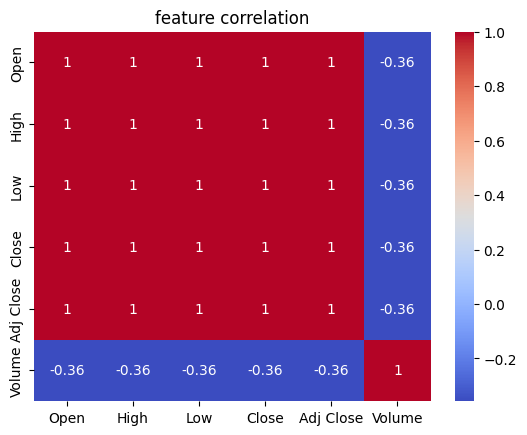

In [ ]:
#DROP non NUMERIC COLUMN
numeric_data=data.select_dtypes(include=['int64','float64'])
#check for feature correlation
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')
plt.title('feature correlation')

In [ ]:
#converting date type
data['Date']=pd.to_datetime(data['Date'])



<ipython-input-15-33d1ac783606>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date']=pd.to_datetime(data['Date'])


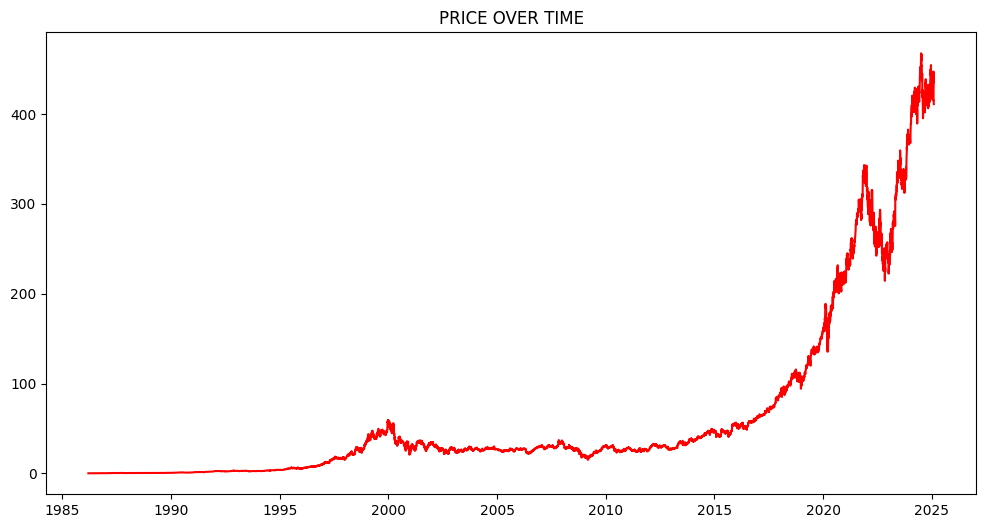

In [ ]:
prediction=data.loc[(data['Date']>datetime(1986,1,1)) & (data['Date']<datetime(2025,1,1))]

plt.figure(figsize=(12,6))
plt.plot(data['Date'],data['Close'],label='Open',color='red')
plt.title("PRICE OVER TIME")
plt.show()

In [ ]:
#preparing LSTM

stock_close=data.filter(['Close'])

dataset=stock_close.values #converting to array

training_data_len=int(np.ceil(len(dataset)*0.95)) #95% data is taking for training

print(training_data_len)


9310


In [ ]:
#PREPROCESSING
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)

training_data=scaled_data[:training_data_len] #95% of our data

x_train,y_train=[],[]

#x_train-->features, y_train=close price

#sliding window for 60 days

for i in range(60,training_data_len):
  x_train.append(training_data[i-60:i,0])
  y_train.append(training_data[i,0])



In [ ]:
#x_train and y_train are list, converting it into arrays for tensorflow

x_train=np.array(x_train)
y_train=np.array(y_train)

#reshaping to 3d

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
#model implementation

model=keras.models.Sequential()

#first layer
model.add(keras.layers.LSTM(64,return_sequences=True,input_shape=(x_train.shape[1],1)))

#second layer
model.add(keras.layers.LSTM(64,return_sequences=False))

#third layer sequential dense -relu
model.add(keras.layers.Dense(128,activation='relu'))

#fourth layer
model.add(keras.layers.Dropout(0.5))

#final/output layer-1
model.add(keras.layers.Dense(1))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compiling
model.compile(optimizer='adam',loss='mae')

training=model.fit(x_train,y_train,epochs=20,batch_size=32)


Epoch 1/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.1242
Epoch 2/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - loss: 0.0652
Epoch 3/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - loss: 0.0570
Epoch 4/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.0621
Epoch 5/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 0.0518
Epoch 6/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - loss: 0.0490
Epoch 7/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 0.0456
Epoch 8/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0472
Epoch 9/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - loss: 0.0480
Epoch 10/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0454
Epoch 11/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0469
Epoch 12/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0453
Epoch 13/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0460
Epoch 14/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 0.0429
Epoch 15/20
290/290 ━━━━━━━━━

In [ ]:
#preparing test data
test_data=scaled_data[training_data_len-60:]
x_test=[]
y_test=dataset[training_data_len:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


#converting x_test to array
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
#make prediction
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [ ]:
#plotting
train=data[:training_data_len]
test=data[training_data_len:]

test=test.copy()

test['Predictions']=predictions


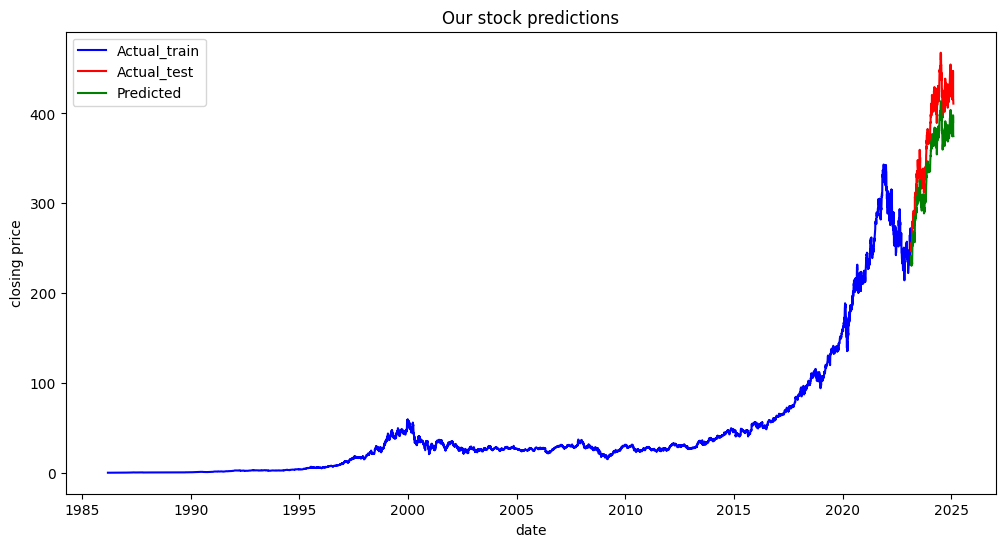

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(train['Date'],train['Close'],label='Actual_train',color='blue')
plt.plot(test['Date'],test['Close'],label='Actual_test',color='red')
plt.plot(test['Date'],test['Predictions'],label='Predicted',color='green')
plt.title("Our stock predictions")
plt.legend()
plt.xlabel('date')
plt.ylabel('closing price')
plt.show()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
mape=mean_absolute_percentage_error(test['Close'],test['Predictions'])
mape

0.09308533383497235

In [ ]:
r2=r2_score(test['Close'],test['Predictions'])
r2

0.5355755658299564

In [ ]:
# test['Predictions']=predictions
# test

,Date,Open,High,Low,Close,Adj Close,Volume,Predictions
9310,2023-02-21,254.479996,255.490005,251.589996,252.669998,249.212997,28397400,240.819214
9311,2023-02-22,254.089996,254.339996,250.339996,251.509995,248.068863,22491100,236.289825
9312,2023-02-23,255.559998,256.839996,250.479996,254.770004,251.284287,29219100,234.683655
9313,2023-02-24,249.960007,251.000000,248.100006,249.220001,245.810196,24990900,236.897903
9314,2023-02-27,252.460007,252.820007,249.389999,250.160004,246.737366,21190000,233.491806
...,...,...,...,...,...,...,...,...
9795,2025-01-28,434.600006,448.380005,431.380005,447.200012,447.200012,23491700,389.294800
9796,2025-01-29,446.690002,446.880005,440.399994,442.329987,442.329987,23581400,397.829865
9797,2025-01-30,418.769989,422.859985,413.160004,414.989990,414.989990,54586300,394.994476
9798,2025-01-31,418.980011,420.690002,414.910004,415.059998,415.059998,34223400,375.909851
